<h1 style="text-align: center;"> PROJECT I: RED WINE INVENTORIES  </h1>

---

## Full Name: Daniel Kofi Godwin Kondo
## ID : 10950054
## Department: Materials science and Engineering

---

<h2 style="text-align: center;"> TABLE CONTENT </h2>


--- 

### INTRODUCTION 
### 1. Pre-processing  of the data 
### 2. Statistical inferences of the entire dataset 
### 3. Statistical inferences of individuals columns
### 4. Statistical Correlation and Heatmap  
### CONCLUSION

---

### Introduction
Dataset of all inventories of red wine of "Augusto WinePro". The exploratory is as follow:

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# defining an object name df 
df = pd.read_csv('data.csv')

In [3]:
# Primary Dataset
df

ID  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.4             0.700         0.00             1.9   
1        2            7.8             0.880         0.00             2.6   
2        3            7.8             0.760         0.04             2.3   
3        4           11.2             0.280         0.56             1.9   
4        5            7.4             0.700         0.00             1.9   
...    ...            ...               ...          ...             ...   
1596  1597            5.9             0.550         0.10             2.2   
1597  1598            6.3             0.510         0.13             2.3   
1598  1599            5.9             0.645         0.12             2.0   
1599  1600            6.0             0.310         0.47             3.6   
1600  1601            7.2             0.390         0.44             2.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700   NaN   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1596      0.062                 39.0                  51.0  0.99512  3.52   
1597      0.076                 29.0                  40.0  0.99574  3.42   
1598      0.075                 32.0                  44.0  0.99547  3.57   
1599      0.067                 18.0                  42.0  0.99549  3.39   
1600      0.066                 22.0                  48.0  0.99494  3.30   

      sulphates  alcohol  quality  
0          0.56      9.4      5.0  
1          0.68      9.8      5.0  
2          0.65      9.8      5.0  
3          0.58      9.8      6.0  
4          0.56      9.4      5.0  
...         ...      ...      ...  
1596       0.76     11.2      6.0  
1597       0.75     11.0      6.0  
1598       0.71     10.2      5.0  
1599       0.66     11.0      6.0  
1600       0.84     11.5      6.0  

[1601 rows x 13 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1601 non-null   int64  
 1   fixed acidity         1600 non-null   float64
 2   volatile acidity      1601 non-null   float64
 3   citric acid           1600 non-null   float64
 4   residual sugar        1601 non-null   float64
 5   chlorides             1598 non-null   float64
 6   free sulfur dioxide   1600 non-null   float64
 7   total sulfur dioxide  1600 non-null   float64
 8   density               1600 non-null   float64
 9   pH                    1600 non-null   float64
 10  sulphates             1601 non-null   float64
 11  alcohol               1601 non-null   float64
 12  quality               1600 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.7 KB


* The dataset has only float and integer value 
* The dataset has empty cell as well 

## 1.Pre-processing of the data

In [5]:
# checking for any duplicate data 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1596    False
1597    False
1598    False
1599    False
1600    False
Length: 1601, dtype: bool

* No duplicate were found

In [6]:
# checking for any empty value
df.isnull().any().any()

True

* There are missing value in the dataset

### Drop of all empty spaces in the entire Dataset 
 The purpose of using this method is to avoid duplication of data in each features, also since the number of empty data in each features are not considerable.

In [7]:
# Renaming the colomns
df = df.rename(columns= {'fixed acidity' : 'fixed_acidity', 'volatile acidity' : 'volatile_acidity', 'citric acid' : 'citric_acid', 'residual sugar' : 'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'})

In [8]:
# reconstruction of the data set 
data = df.loc[0:1601, ['fixed_acidity','volatile_acidity', 'citric_acid','residual_sugar', 'chlorides','free_sulfur_dioxide','total_sulfur_dioxide', 'density','pH','sulphates','alcohol','quality']]

In [9]:
# Getting rid of all empty dataset 
df.dropna(inplace= True)

In [10]:
# checking if there is correction
df.isnull().any().any()

False

* None empty data found

In [11]:
# New dataset after pre-processing
df

ID  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0        1            7.4             0.700         0.00             1.9   
1        2            7.8             0.880         0.00             2.6   
3        4           11.2             0.280         0.56             1.9   
4        5            7.4             0.700         0.00             1.9   
5        6            7.4             0.660         0.00             1.8   
...    ...            ...               ...          ...             ...   
1596  1597            5.9             0.550         0.10             2.2   
1597  1598            6.3             0.510         0.13             2.3   
1598  1599            5.9             0.645         0.12             2.0   
1599  1600            6.0             0.310         0.47             3.6   
1600  1601            7.2             0.390         0.44             2.6   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
5         0.075                 13.0                  40.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1596      0.062                 39.0                  51.0  0.99512  3.52   
1597      0.076                 29.0                  40.0  0.99574  3.42   
1598      0.075                 32.0                  44.0  0.99547  3.57   
1599      0.067                 18.0                  42.0  0.99549  3.39   
1600      0.066                 22.0                  48.0  0.99494  3.30   

      sulphates  alcohol  quality  
0          0.56      9.4      5.0  
1          0.68      9.8      5.0  
3          0.58      9.8      6.0  
4          0.56      9.4      5.0  
5          0.56      9.4      5.0  
...         ...      ...      ...  
1596       0.76     11.2      6.0  
1597       0.75     11.0      6.0  
1598       0.71     10.2      5.0  
1599       0.66     11.0      6.0  
1600       0.84     11.5      6.0  

[1591 rows x 13 columns]

In [12]:
# checking for duplicated data 
df.duplicated()

0       False
1       False
3       False
4       False
5       False
        ...  
1596    False
1597    False
1598    False
1599    False
1600    False
Length: 1591, dtype: bool

In [13]:
# out putting the 60 first row 
df.head(60)

ID  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0    1            7.4             0.700         0.00             1.9   
1    2            7.8             0.880         0.00             2.6   
3    4           11.2             0.280         0.56             1.9   
4    5            7.4             0.700         0.00             1.9   
5    6            7.4             0.660         0.00             1.8   
6    7            7.9             0.600         0.06             1.6   
7    8            7.3             0.650         0.00             1.2   
8    9            7.8             0.580         0.02             2.0   
9   10            7.5             0.500         0.36             6.1   
11  12            7.5             0.500         0.36             6.1   
12  13            5.6             0.615         0.00             1.6   
13  14            7.8             0.610         0.29             1.6   
14  15            8.9             0.620         0.18             3.8   
15  16            8.9             0.620         0.19             3.9   
16  17            8.5             0.280         0.56             1.8   
17  18            8.1             0.560         0.28             1.7   
18  19            7.4             0.590         0.08             4.4   
19  20            7.9             0.320         0.51             1.8   
20  21            8.9             0.220         0.48             1.8   
21  22            7.6             0.390         0.31             2.3   
22  23            7.9             0.430         0.21             1.6   
24  25            6.9             0.400         0.14             2.4   
25  26            6.3             0.390         0.16             1.4   
26  27            7.6             0.410         0.24             1.8   
27  28            7.9             0.430         0.21             1.6   
28  29            7.1             0.710         0.00             1.9   
29  30            7.8             0.645         0.00             2.0   
30  31            6.7             0.675         0.07             2.4   
31  32            6.9             0.685         0.00             2.5   
32  33            8.3             0.655         0.12             2.3   
33  34            6.9             0.605         0.12            10.7   
34  35            5.2             0.320         0.25             1.8   
35  36            7.8             0.645         0.00             5.5   
36  37            7.8             0.600         0.14             2.4   
37  38            8.1             0.380         0.28             2.1   
38  39            5.7             1.130         0.09             1.5   
39  40            7.3             0.450         0.36             5.9   
40  41            7.3             0.450         0.36             5.9   
41  42            8.8             0.610         0.30             2.8   
42  43            7.5             0.490         0.20             2.6   
43  44            8.1             0.660         0.22             2.2   
44  45            6.8             0.670         0.02             1.8   
45  46            4.6             0.520         0.15             2.1   
46  47            7.7             0.935         0.43             2.2   
47  48            8.7             0.290         0.52             1.6   
48  49            6.4             0.400         0.23             1.6   
49  50            5.6             0.310         0.37             1.4   
50  51            8.8             0.660         0.26             1.7   
51  52            6.6             0.520         0.04             2.2   
52  53            6.6             0.500         0.04             2.1   
53  54            8.6             0.380         0.36             3.0   
54  55            7.6             0.510         0.15             2.8   
55  56            7.7             0.620         0.04             3.8   
56  57           10.2             0.420         0.57             3.4   
57  58            7.5             0.630     

In [14]:
# Information about the entire dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1600
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1591 non-null   int64  
 1   fixed_acidity         1591 non-null   float64
 2   volatile_acidity      1591 non-null   float64
 3   citric_acid           1591 non-null   float64
 4   residual_sugar        1591 non-null   float64
 5   chlorides             1591 non-null   float64
 6   free_sulfur_dioxide   1591 non-null   float64
 7   total_sulfur_dioxide  1591 non-null   float64
 8   density               1591 non-null   float64
 9   pH                    1591 non-null   float64
 10  sulphates             1591 non-null   float64
 11  alcohol               1591 non-null   float64
 12  quality               1591 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 174.0 KB


In [15]:
df.shape

(1591, 13)

* After pre processing, 1591 was entered with data type float  

### 2- Statistical inferences of the entire dataset 

In [16]:
# Generale descriptive of the entire data set
df.describe()

ID  fixed_acidity  volatile_acidity  citric_acid  \
count  1591.000000    1591.000000       1591.000000  1591.000000   
mean    801.060968       8.320616          0.527681     0.271477   
std     460.740942       1.740134          0.179045     0.194807   
min       1.000000       4.600000          0.120000     0.000000   
25%     402.500000       7.100000          0.390000     0.090000   
50%     801.000000       7.900000          0.520000     0.260000   
75%    1199.500000       9.200000          0.640000     0.420000   
max    1601.000000      15.900000          1.580000     1.000000   

       residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
count     1591.000000  1591.000000          1591.000000           1591.000000   
mean         2.540761     0.087500            15.861722             46.498429   
std          1.413076     0.047175            10.429385             32.998659   
min          0.900000     0.012000             1.000000              6.000000   
25%          1.900000     0.070000             7.000000             22.000000   
50%          2.200000     0.079000            14.000000             38.000000   
75%          2.600000     0.090000            21.000000             62.000000   
max         15.500000     0.611000            72.000000            289.000000   

           density           pH    sulphates      alcohol      quality  
count  1591.000000  1591.000000  1591.000000  1591.000000  1591.000000  
mean      0.996747     3.311358     0.658611    10.426053     5.637964  
std       0.001889     0.154548     0.169786     1.066706     0.807772  
min       0.990070     2.740000     0.330000     8.400000     3.000000  
25%       0.995600     3.210000     0.550000     9.500000     5.000000  
50%       0.996750     3.310000     0.620000    10.200000     6.000000  
75%       0.997845     3.400000     0.730000    11.100000     6.000000  
max       1.003690     4.010000     2.000000    14.900000     8.000000

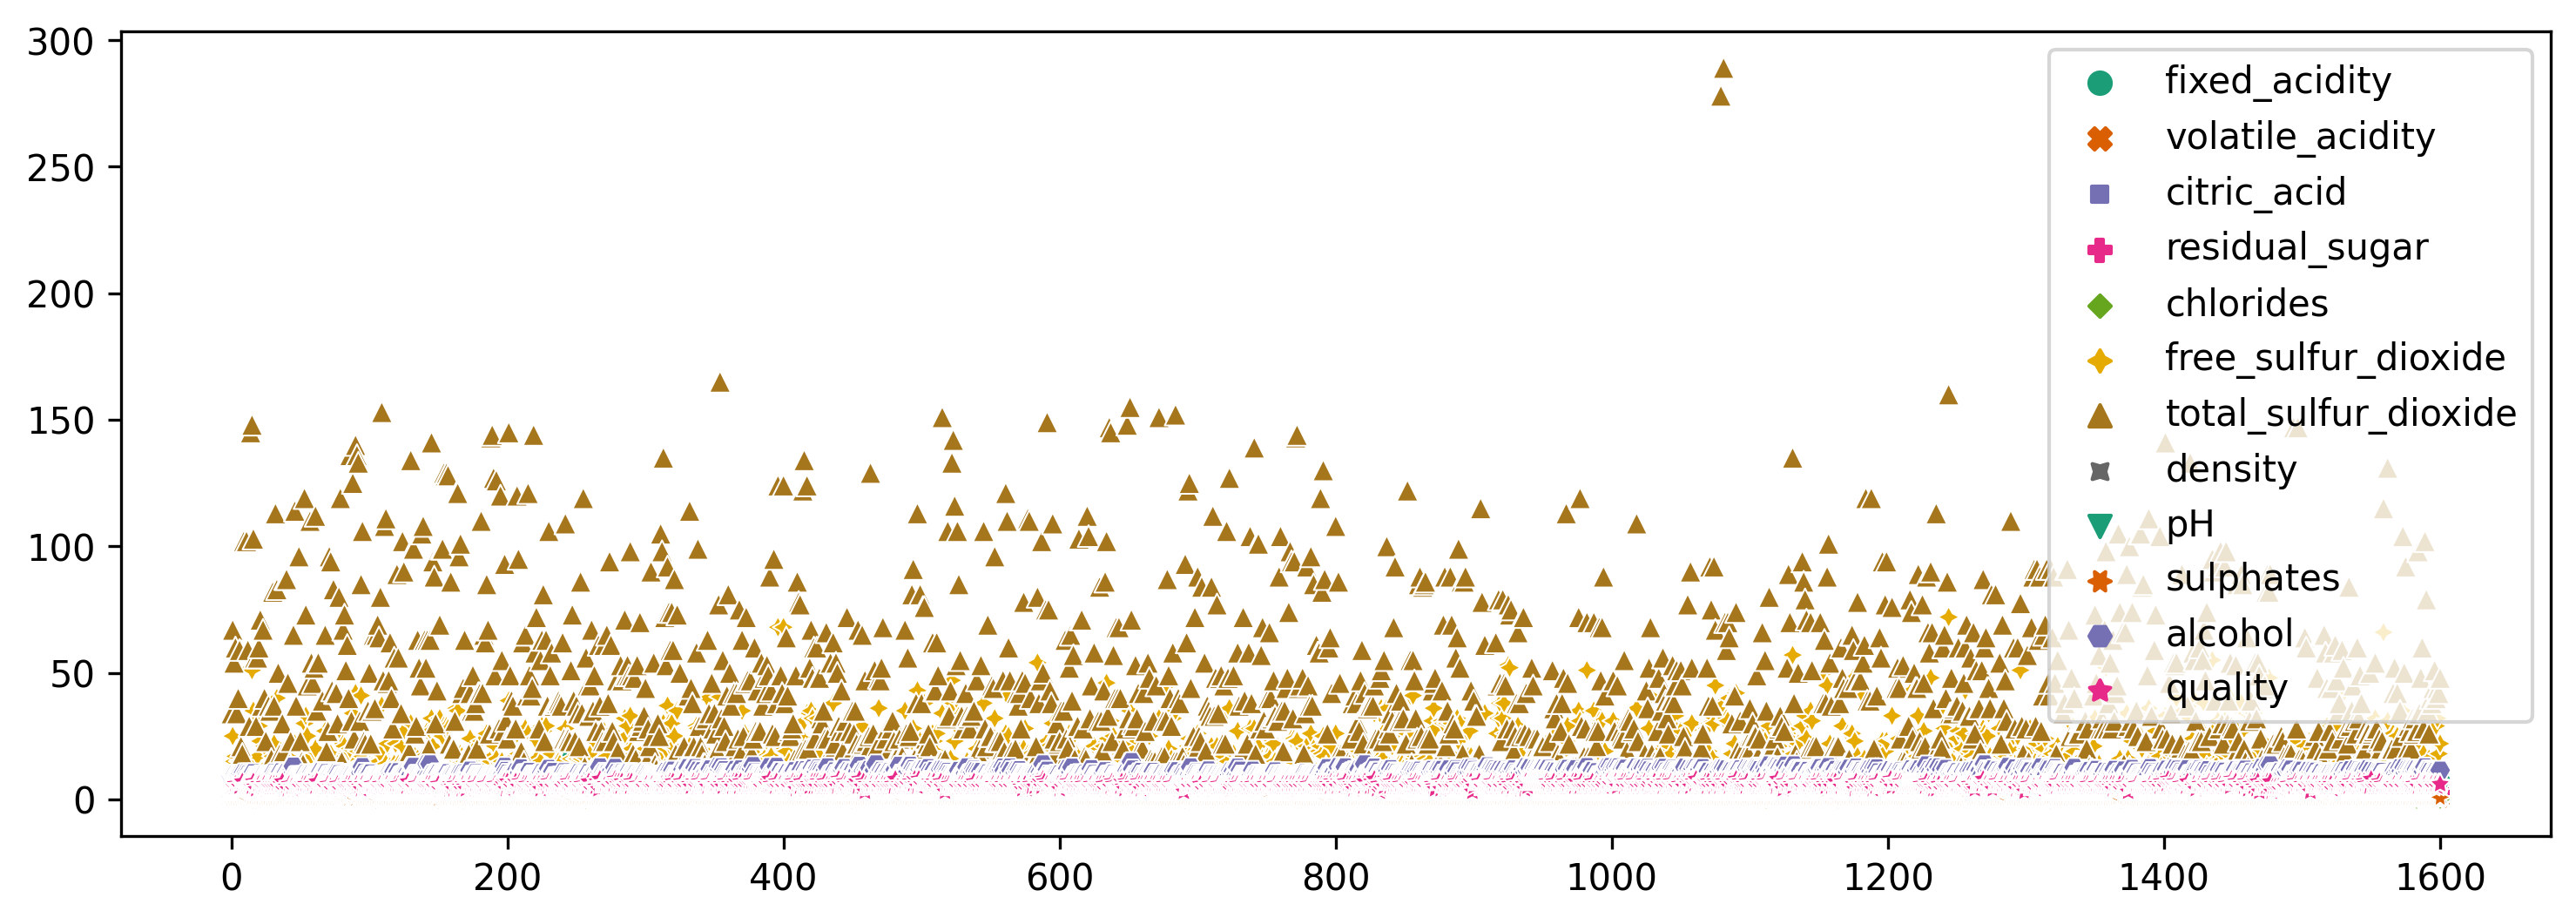

In [17]:
plt.figure(figsize=(12,4), dpi= 300)
p= sns.scatterplot(data= data, palette= 'Dark2')
plt.show()

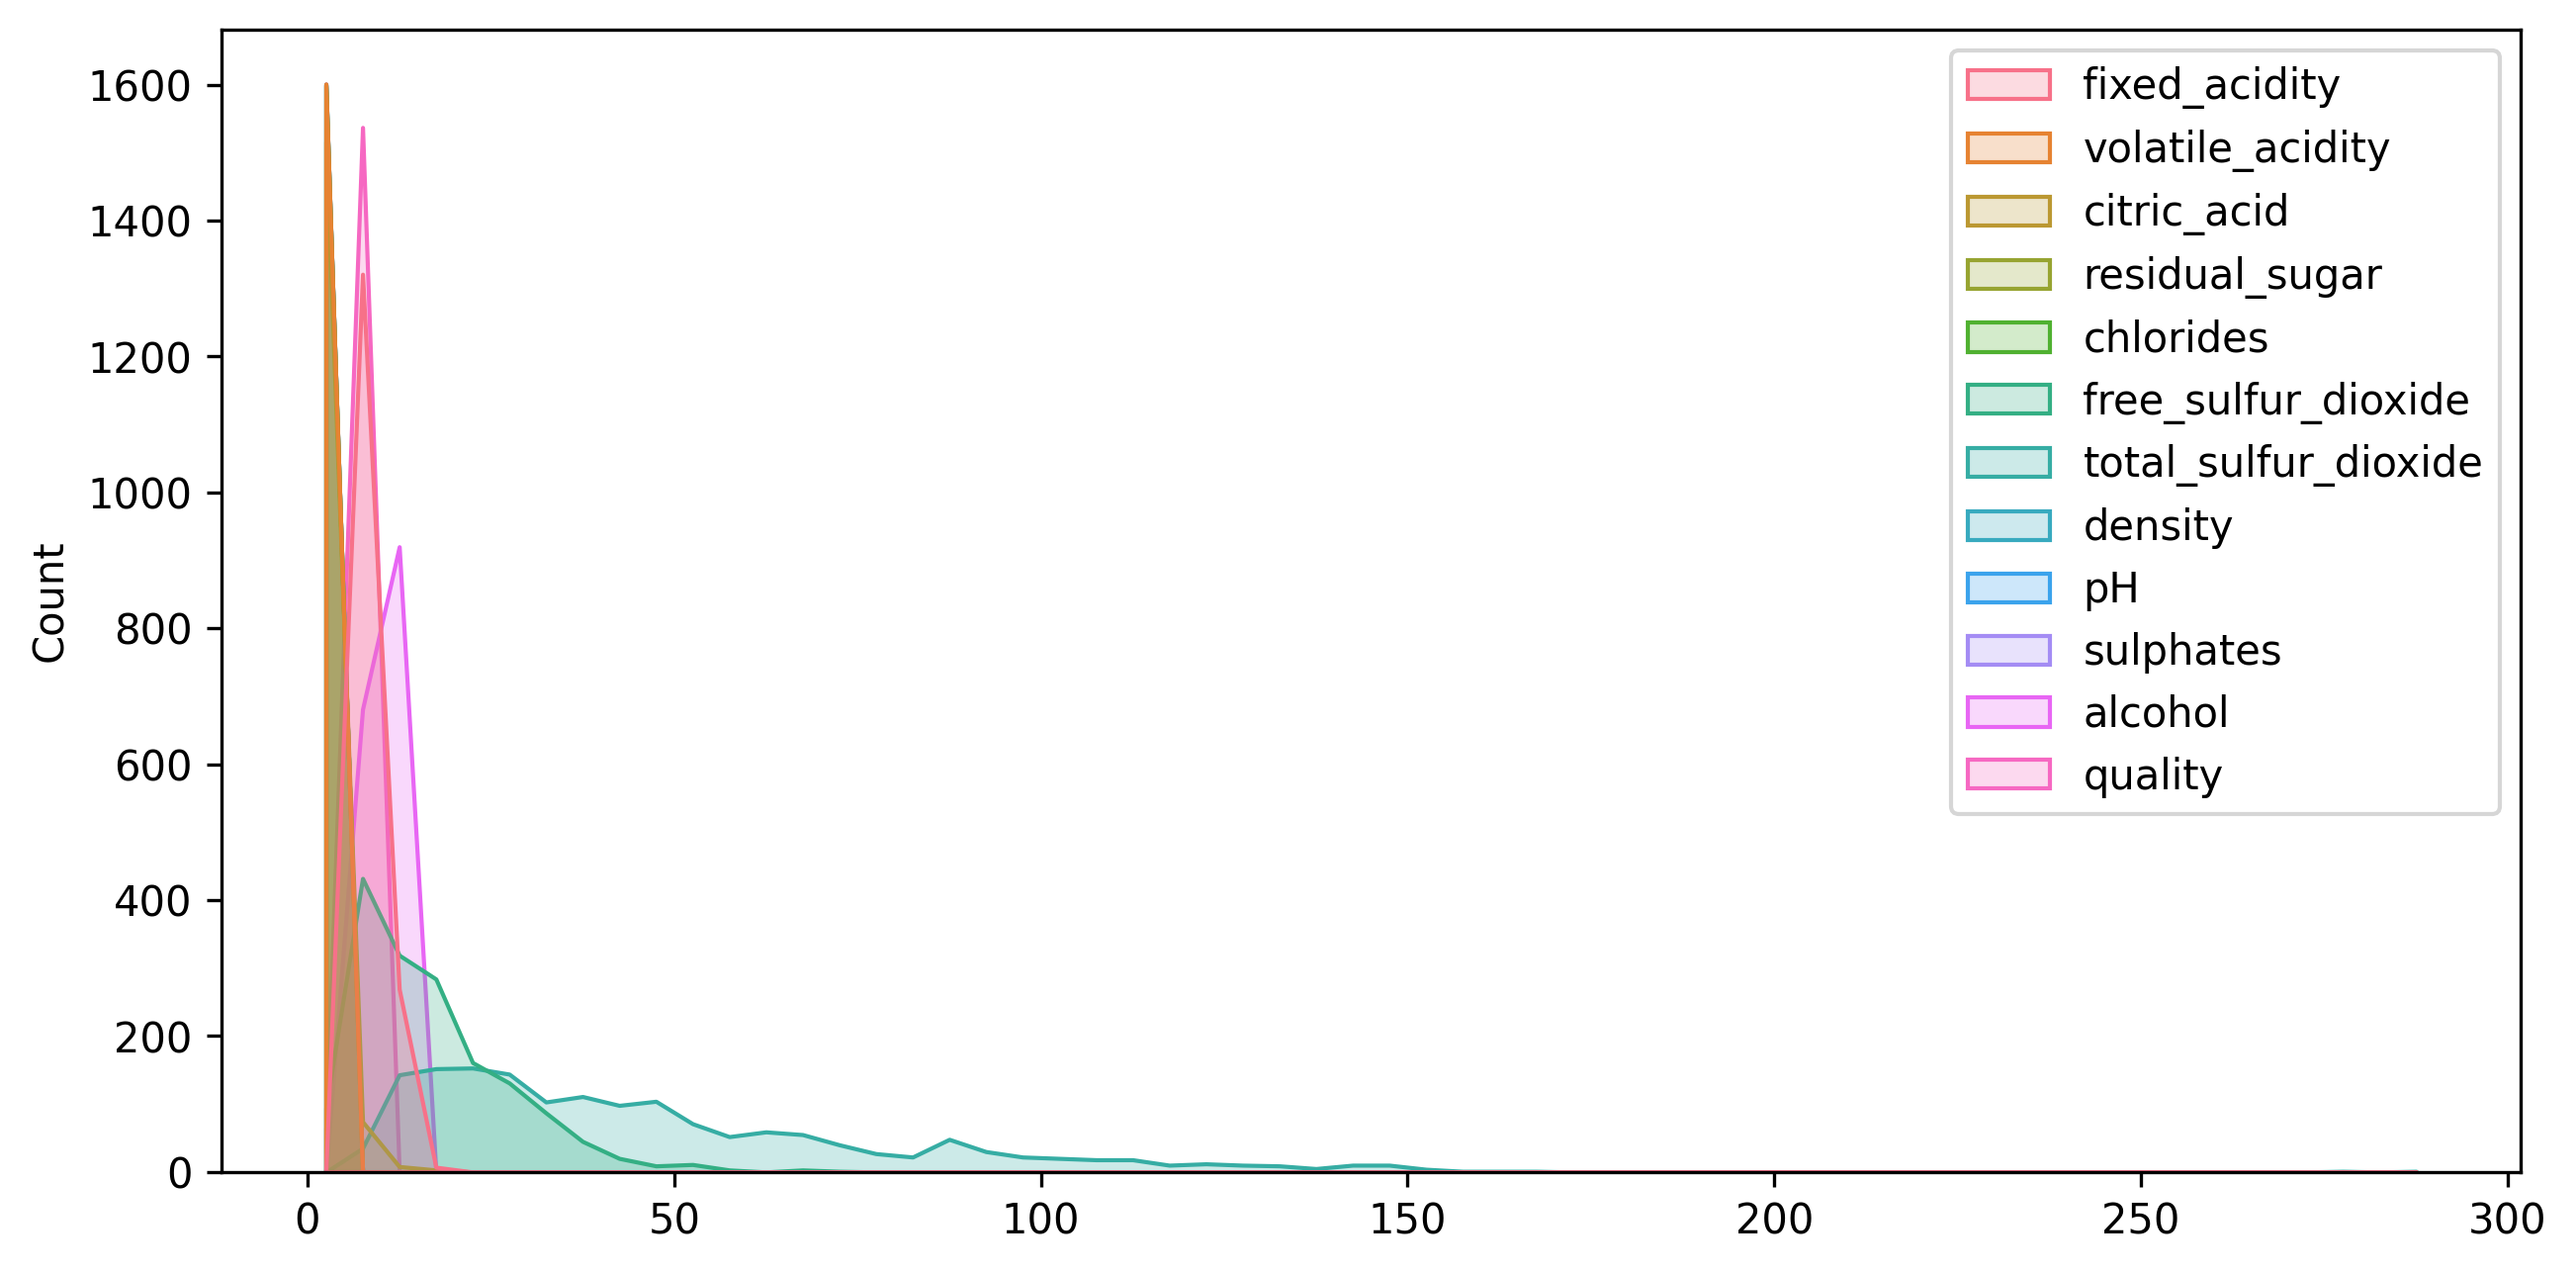

In [20]:
fig = plt.figure(figsize=(10,5), dpi=300)
D= sns.histplot(data= data, bins =10 , binwidth=5, element= 'poly')
plt.show()

- The histogram plot of the entire dataset shows that volatile acidity, citric acid , residual sugar, pH and fixed acidity have the highest count that is between [0:1400].
- Sulfate, alcohol and quality have the average count that is between [0:800]
- And free sulfur dioxide, total sulfur dioxide, chlorides, density have the lowest count that is between [0:400]

### 3- Statistical inferences of individual columns 

#### Descriptive of each columns 

In [21]:
df.fixed_acidity.describe()

count    1591.000000
mean        8.320616
std         1.740134
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed_acidity, dtype: float64

In [22]:
df.volatile_acidity.describe()

count    1591.000000
mean        0.527681
std         0.179045
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile_acidity, dtype: float64

In [23]:
df.citric_acid.describe()

count    1591.000000
mean        0.271477
std         0.194807
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric_acid, dtype: float64

In [24]:
df.residual_sugar.describe()

count    1591.000000
mean        2.540761
std         1.413076
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual_sugar, dtype: float64

In [25]:
df.chlorides.describe()

count    1591.000000
mean        0.087500
std         0.047175
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

In [26]:
df.free_sulfur_dioxide.describe()

count    1591.000000
mean       15.861722
std        10.429385
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free_sulfur_dioxide, dtype: float64

In [27]:
df.total_sulfur_dioxide.describe()

count    1591.000000
mean       46.498429
std        32.998659
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total_sulfur_dioxide, dtype: float64

In [28]:
df.density.describe()

count    1591.000000
mean        0.996747
std         0.001889
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997845
max         1.003690
Name: density, dtype: float64

In [29]:
df.pH.describe()

count    1591.000000
mean        3.311358
std         0.154548
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [30]:
df.sulphates.describe()

count    1591.000000
mean        0.658611
std         0.169786
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [31]:
df.alcohol.describe()

count    1591.000000
mean       10.426053
std         1.066706
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [32]:
df.quality.describe()

count    1591.000000
mean        5.637964
std         0.807772
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

#### Pie plot of each columns 

* A subplot2grid to combine a pie plot of each feature is as follow

Text(0.5, 1.0, 'quality')

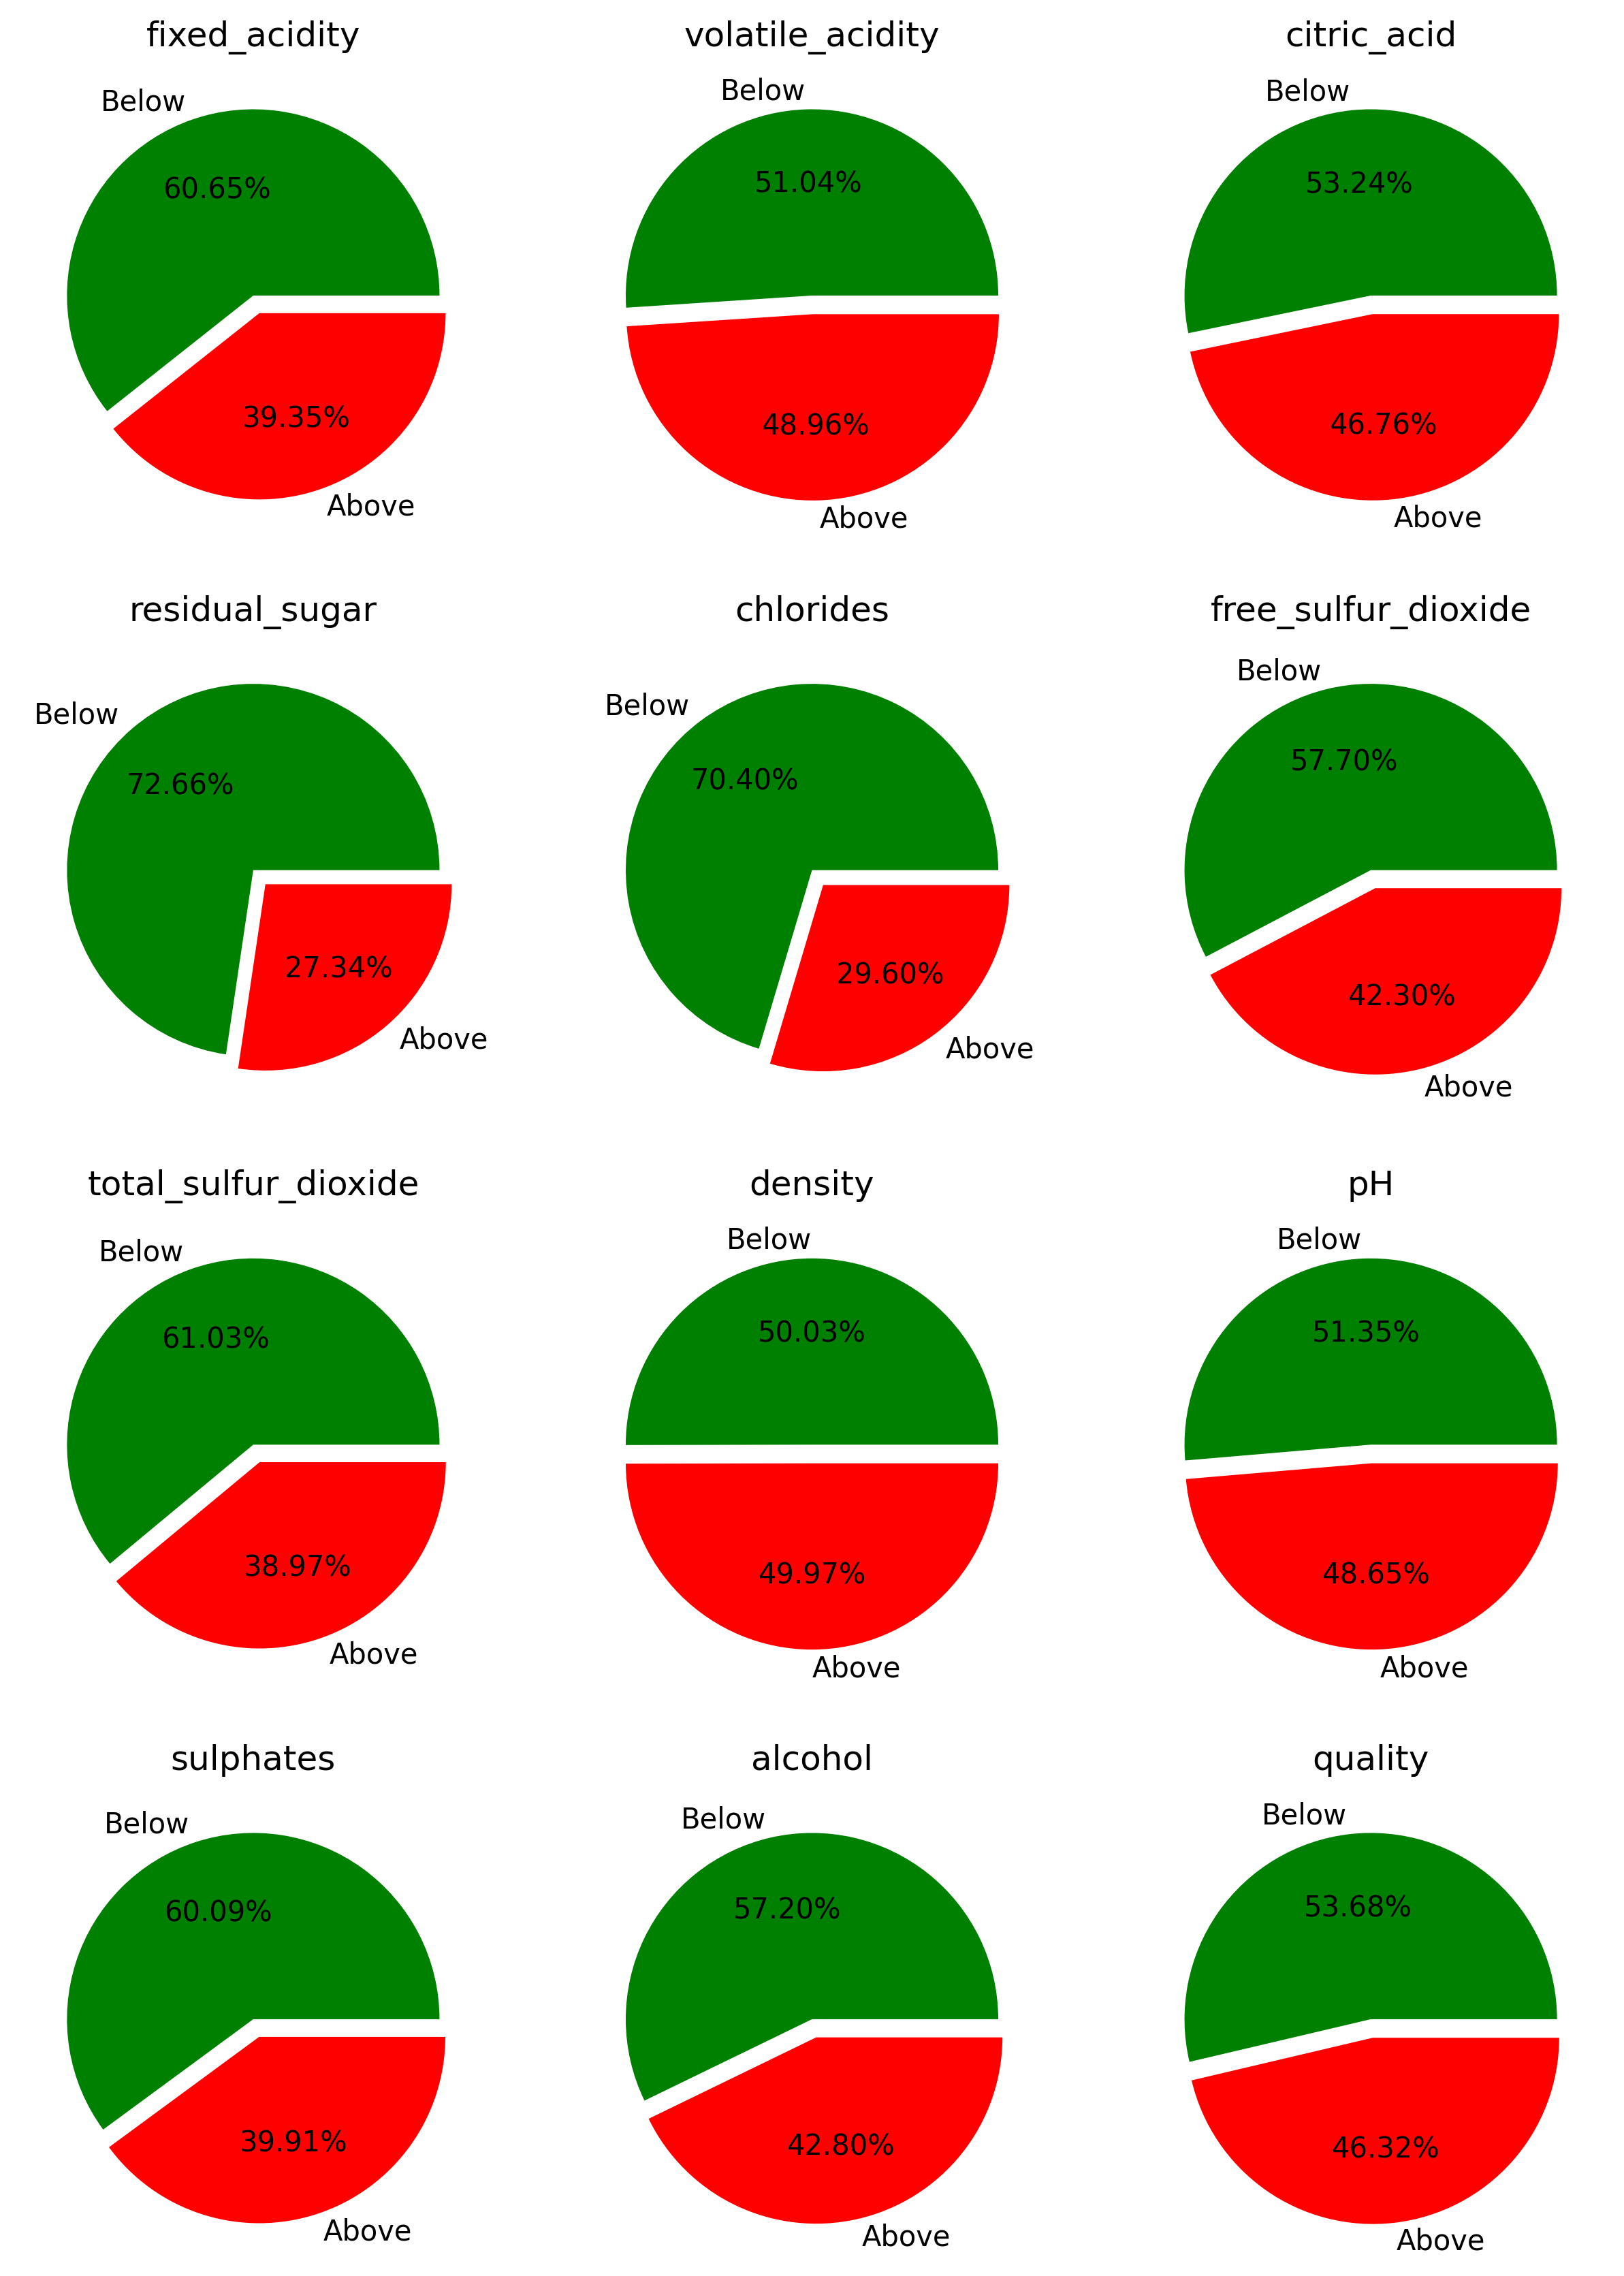

In [33]:
fig = plt.figure(figsize=(10,14), dpi=300)
explode = [0,0.1]
lb= ['Below', 'Above']
#4 rows 3 columns
# giving all
x= df.fixed_acidity < df.fixed_acidity.mean()
#first row, first column
ax1 = plt.subplot2grid((4,3),(0,0))
plt.pie(x.value_counts(), colors=("g","r"),labels= lb, autopct = '%.2f%%', explode= explode)
plt.title('fixed_acidity')

y= df.volatile_acidity < df.volatile_acidity.mean()
#first row sec column
ax2 = plt.subplot2grid((4,3),(0, 1))
plt.pie(y.value_counts(),colors=("g","r"),labels= lb, autopct = '%.2f%%', explode= explode)
plt.title('volatile_acidity')

z = df.citric_acid < df.citric_acid.mean()
#first row thrird column
ax3 = plt.subplot2grid((4,3),(0, 2))
plt.pie(z.value_counts(),colors=("g","r"),labels= lb, autopct = '%.2f%%', explode= explode)
plt.title('citric_acid')

a= df.residual_sugar < df.residual_sugar.mean()
#second row, first column
ax1 = plt.subplot2grid((4,3),(1,0))
plt.pie(a.value_counts(),colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('residual_sugar')

c=df.chlorides<df.chlorides.mean()
#second row thrird column
ax1 = plt.subplot2grid((4,3), (1, 1))
plt.pie(c.value_counts() ,colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('chlorides')

d= df.free_sulfur_dioxide<df.free_sulfur_dioxide.mean()
#third row, first column
ax1 = plt.subplot2grid((4,3),(1,2))
plt.pie(d.value_counts() ,colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('free_sulfur_dioxide')

e= df.total_sulfur_dioxide< df.total_sulfur_dioxide.mean()
#third row sec column
ax1 = plt.subplot2grid((4,3),(2, 0))
plt.pie(e.value_counts(),colors=("g","r"),autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('total_sulfur_dioxide')

f= df.density < df.density.mean()
#third row thrird column
ax1 = plt.subplot2grid((4,3),(2, 1))
plt.pie(f.value_counts(),colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('density')

g= df.pH<df.pH.mean()
#fourth row, first column
ax1 = plt.subplot2grid((4,3),(2,2))
plt.pie(g.value_counts(),colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('pH')

h=df.sulphates<df.sulphates.mean()
#fourth row sec column
ax1 = plt.subplot2grid((4,3),(3,0))
plt.pie(h.value_counts(), colors=("g","r"),autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('sulphates')

i=df.alcohol<df.alcohol.mean()
#fourth row thrird column
ax1 = plt.subplot2grid((4,3),(3,1))
plt.pie(i.value_counts(),colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('alcohol')

j=df.quality<df.quality.mean()
#fifth row, first column
ax1 = plt.subplot2grid((4,3),(3,2))
plt.pie(j.value_counts(),colors=("g","r"),autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('quality')

* Residual sugar has the highest number of element concentration below the its mean 
* Chlorides has the lower percentage of element concentration above the its mean 
* Densityr has the lowers number of element concentration below the its mean 
* Sulphates has the lower percentage of element concentration above the its mean

In [34]:
# determination of number of unique value in each columns 
for col in df.columns.values:
    print('the unique values of {} = {}'.format(col,df[col].nunique()))

the unique values of ID = 1591
the unique values of fixed_acidity = 96
the unique values of volatile_acidity = 143
the unique values of citric_acid = 80
the unique values of residual_sugar = 91
the unique values of chlorides = 153
the unique values of free_sulfur_dioxide = 60
the unique values of total_sulfur_dioxide = 144
the unique values of density = 434
the unique values of pH = 89
the unique values of sulphates = 96
the unique values of alcohol = 65
the unique values of quality = 6


* Density has the maximum unique value of : 434
* Quality has the minimun unique value of : 6
* And since quality has the minimum unique value the catplot will be possible  

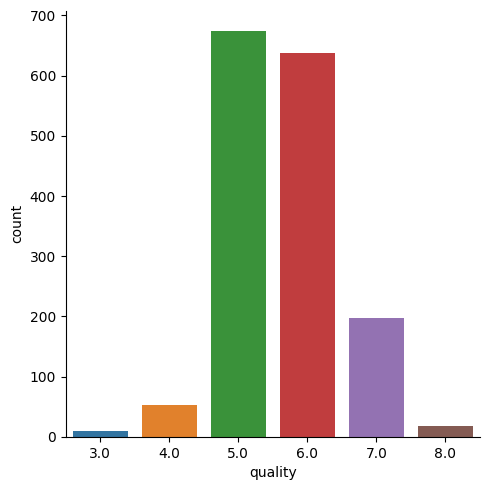

In [35]:
sns.catplot(x= 'quality', data= df, kind= 'count')

* The intervale [4.5 : 5.5] are mostly repeating in each sample which is represent as green in the above plot  
* Most of the sample will have a quality between this intervale

#### Box plot of the dataset 

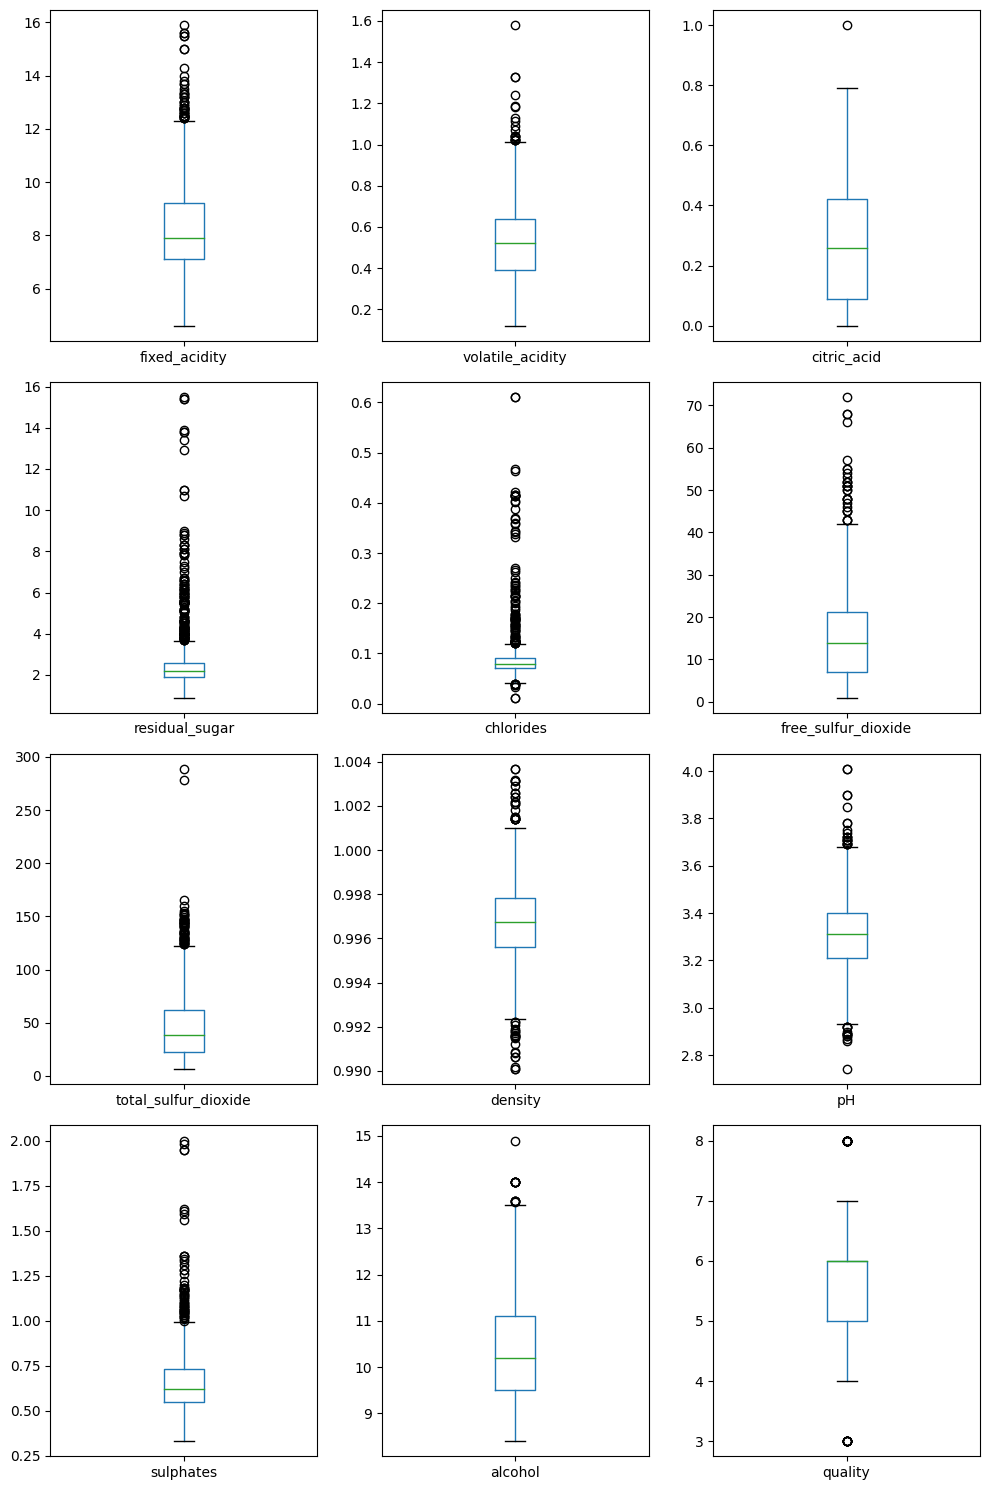

In [36]:
plt.figure(figsize=(10,15))
for i, col in enumerate(list(data.columns.values)):
    plt.subplot(4,3,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()

* The points outside the 1.5-IQR range or more above the third quartile are considered outliers.
* All other features have outliers besides alcohol.

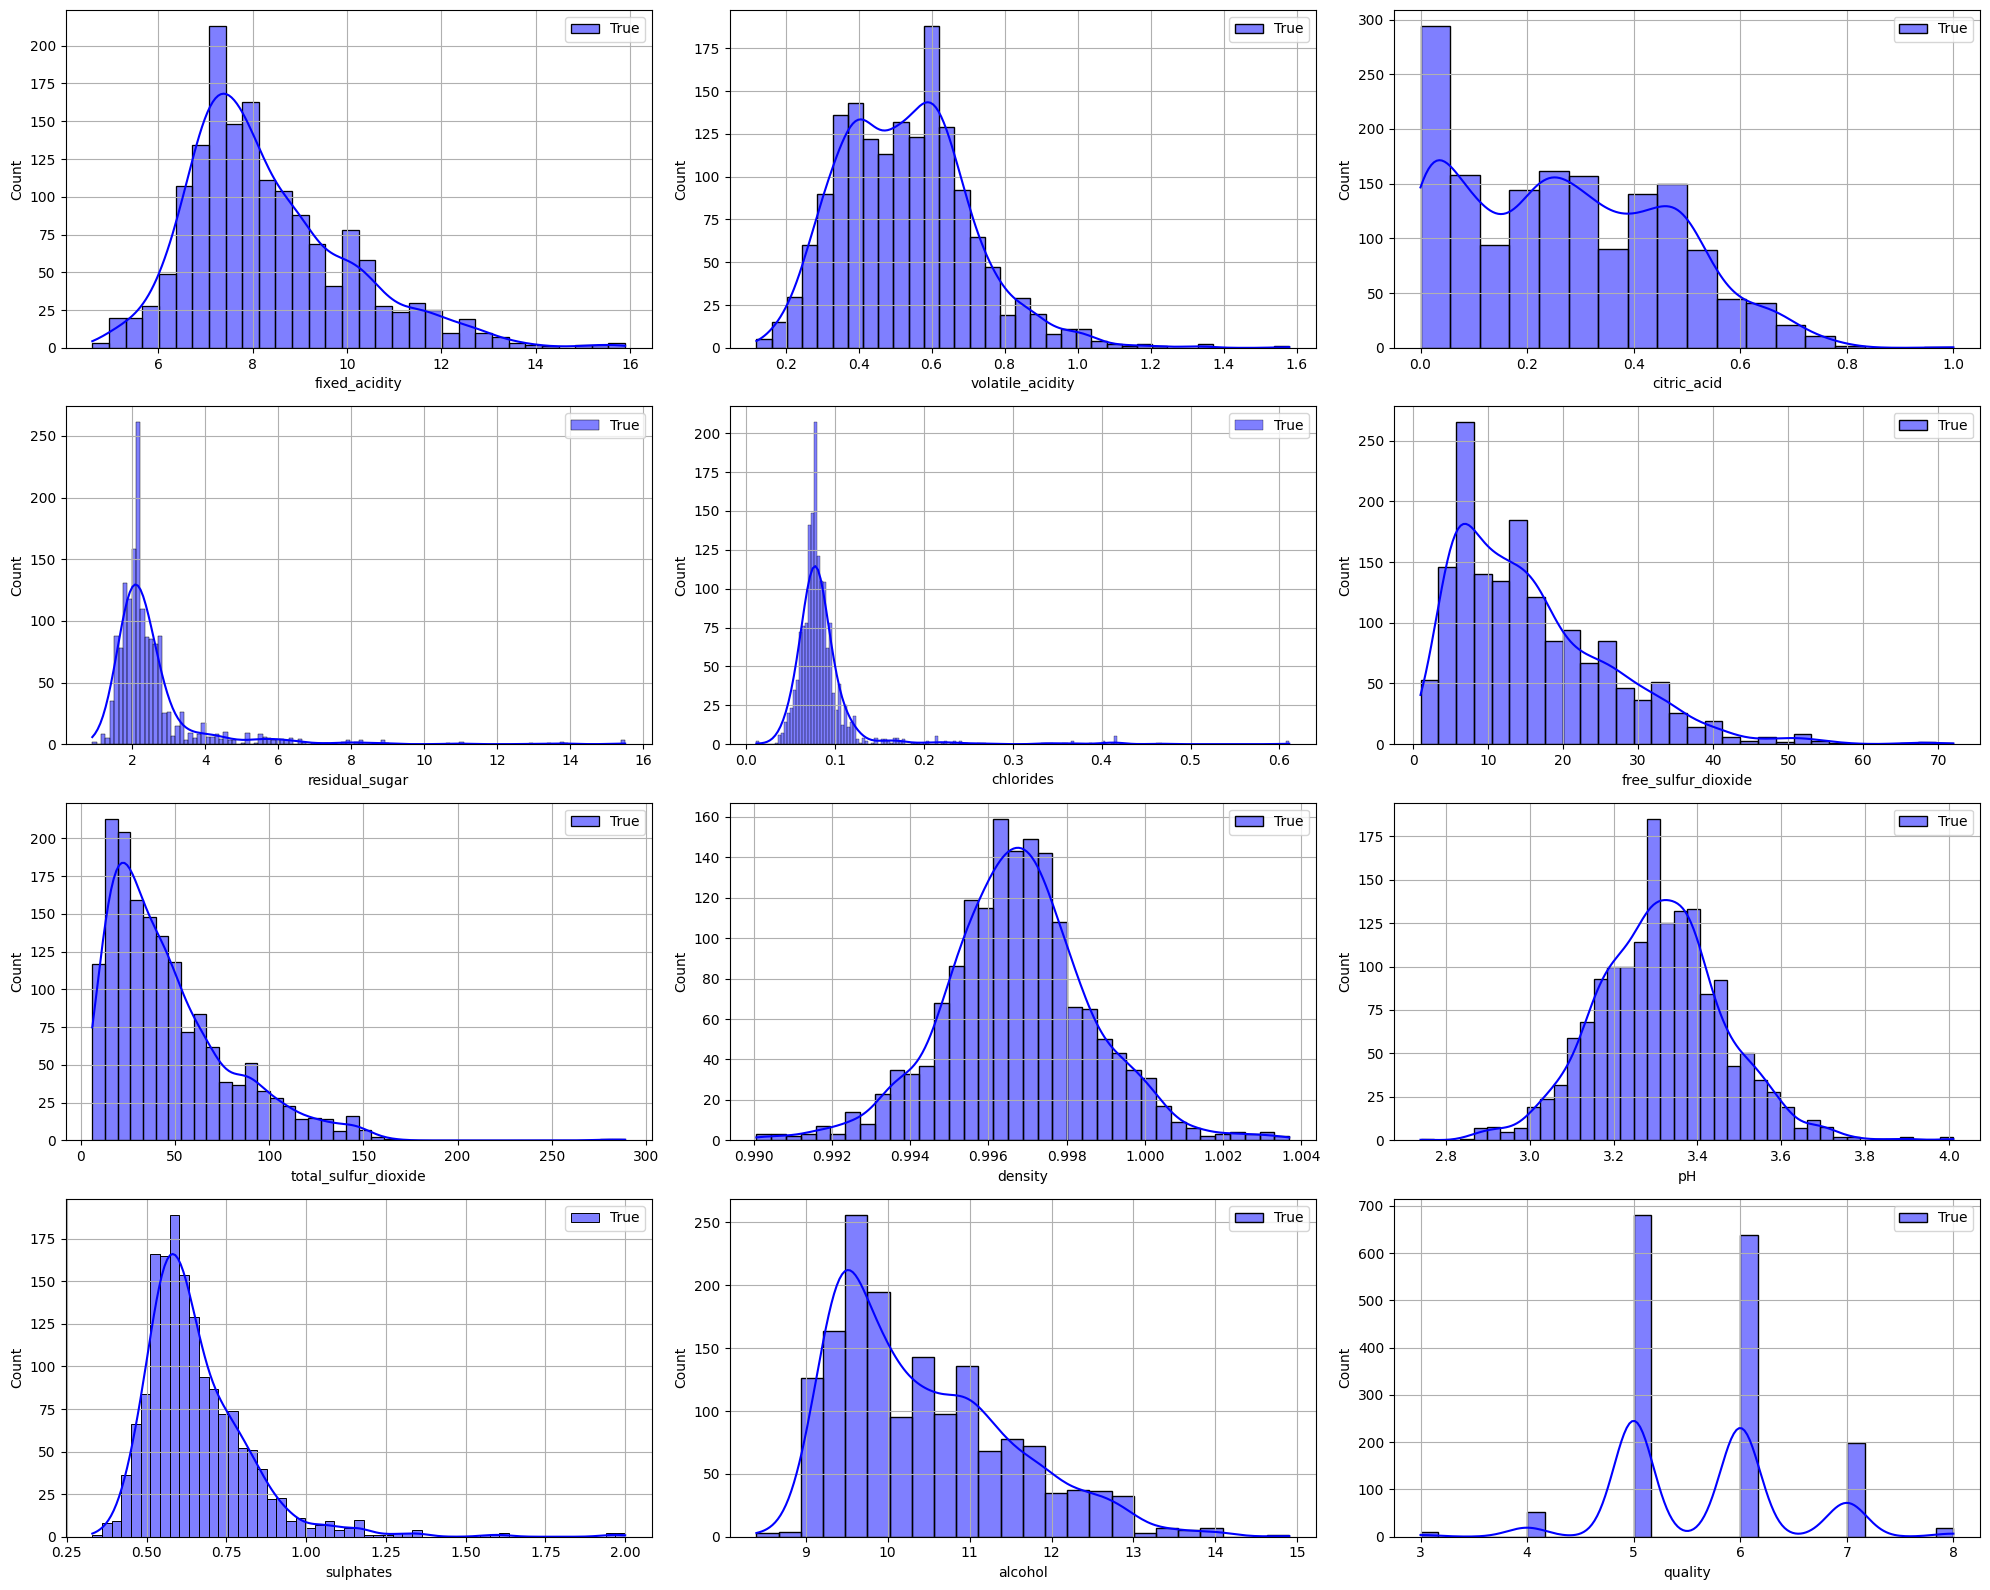

In [37]:
plt.figure(figsize=(20,16))
for i, col in enumerate(list(data.columns.values)):
    plt.subplot(4,3,i+1)
    sns.histplot(data[col], color='b', kde=True, label= True)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

* The pH characteristic has a roughly normal distribution and centered.
* Any independent trait that is still present is curved to the left.
* Only Quality has a distinct bar plot

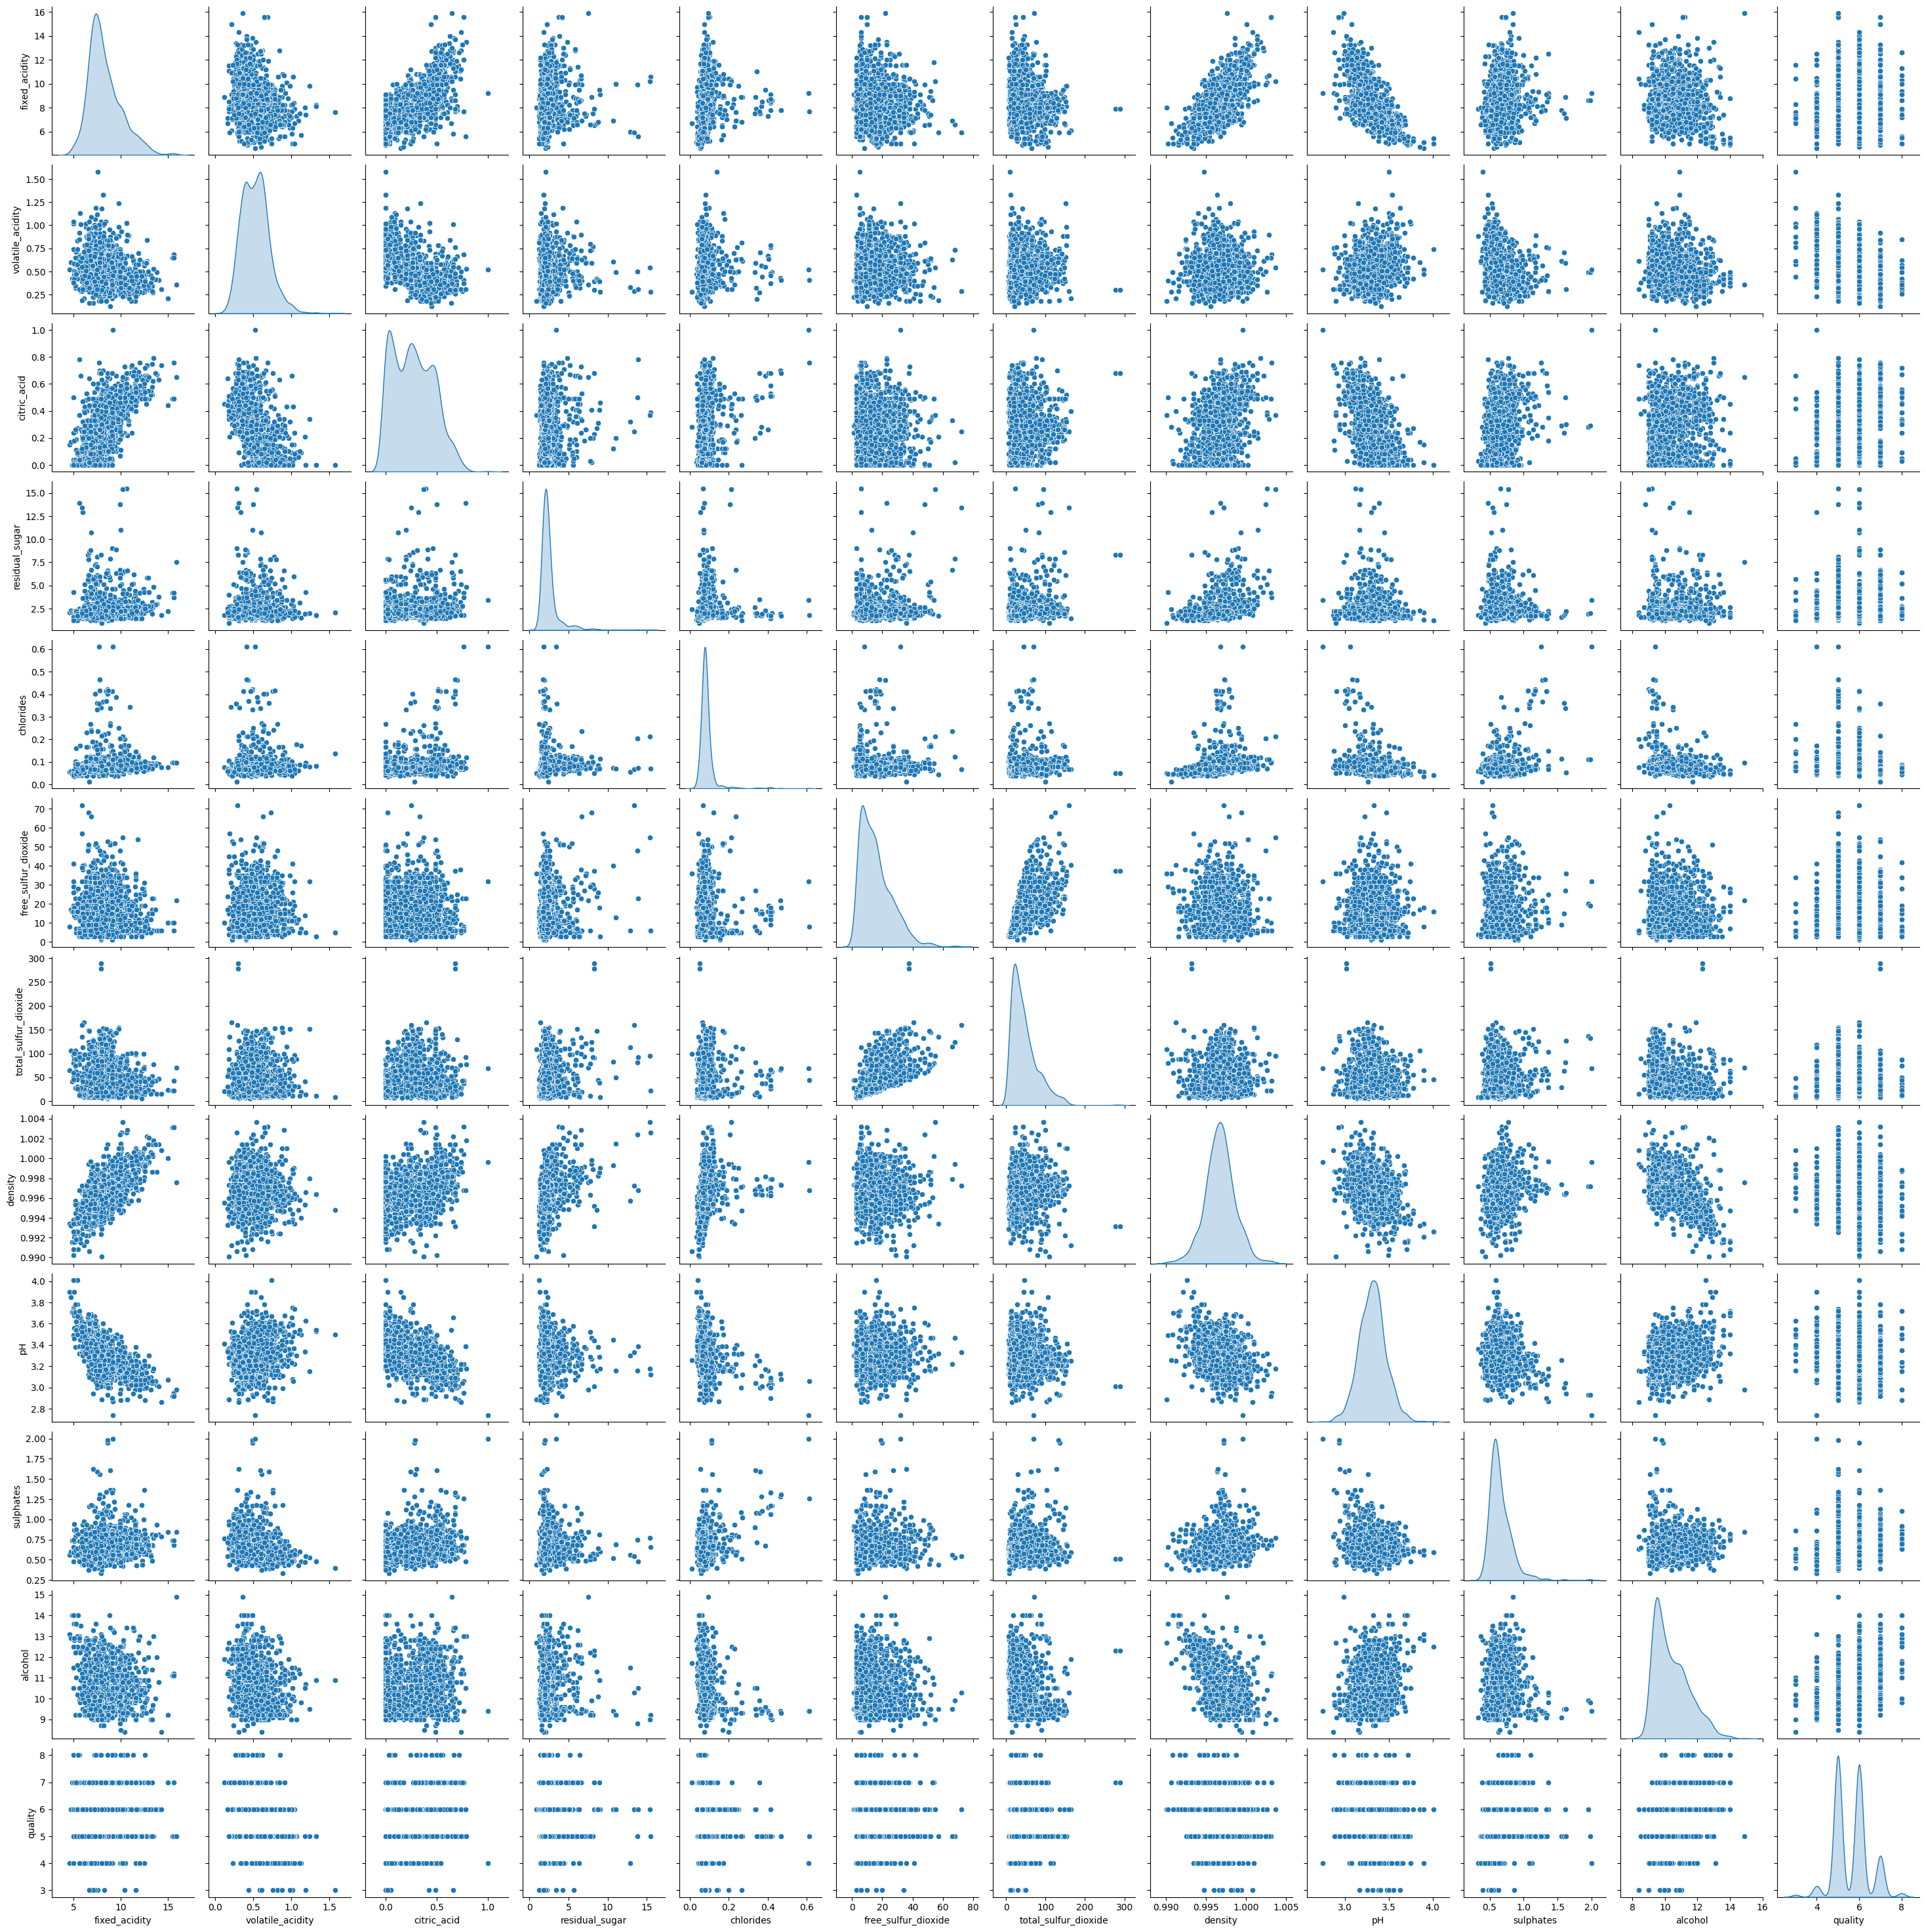

In [38]:
sns.pairplot(data=data, kind='scatter', diag_kind='kde')

* The visualization pairwise show the relationships between variables in this dataset using the Seaborn Pairplot.
* By condensing the data into a single figure, gives a pleasant visual representation of the data and aids in understanding our data.

### 4. Statistical Correlation and Heatmap

In [39]:
data_correlation= data.corr()

In [40]:
data_correlation

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.255570     0.671061   
volatile_acidity          -0.255570          1.000000    -0.552917   
citric_acid                0.671061         -0.552917     1.000000   
residual_sugar             0.114601          0.001877     0.143518   
chlorides                  0.093544          0.060826     0.204054   
free_sulfur_dioxide       -0.153049         -0.010592    -0.061269   
total_sulfur_dioxide      -0.113356          0.076249     0.036030   
density                    0.667912          0.022771     0.364309   
pH                        -0.682644          0.235306    -0.543019   
sulphates                  0.182303         -0.261364     0.312895   
alcohol                   -0.061859         -0.202672     0.109957   
quality                    0.124831         -0.390790     0.226906   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.114601   0.093544            -0.153049   
volatile_acidity            0.001877   0.060826            -0.010592   
citric_acid                 0.143518   0.204054            -0.061269   
residual_sugar              1.000000   0.055389             0.186797   
chlorides                   0.055389   1.000000             0.005593   
free_sulfur_dioxide         0.186797   0.005593             1.000000   
total_sulfur_dioxide        0.201783   0.047254             0.666989   
density                     0.355203   0.200474            -0.021865   
pH                         -0.085591  -0.265394             0.069919   
sulphates                   0.005668   0.371113             0.051711   
alcohol                     0.042273  -0.221390            -0.069606   
quality                     0.013847  -0.128652            -0.051634   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.113356  0.667912 -0.682644   0.182303   
volatile_acidity                  0.076249  0.022771  0.235306  -0.261364   
citric_acid                       0.036030  0.364309 -0.543019   0.312895   
residual_sugar                    0.201783  0.355203 -0.085591   0.005668   
chlorides                         0.047254  0.200474 -0.265394   0.371113   
free_sulfur_dioxide               0.666989 -0.021865  0.069919   0.051711   
total_sulfur_dioxide              1.000000  0.071067 -0.066825   0.042323   
density                           0.071067  1.000000 -0.341436   0.147777   
pH                               -0.066825 -0.341436  1.000000  -0.196542   
sulphates                         0.042323  0.147777 -0.196542   1.000000   
alcohol                          -0.205928 -0.496288  0.205533   0.094361   
quality                          -0.186360 -0.174483 -0.058157   0.251274   

                       alcohol   quality  
fixed_acidity        -0.061859  0.124831  
volatile_acidity     -0.202672 -0.390790  
citric_acid           0.109957  0.226906  
residual_sugar        0.042273  0.013847  
chlorides            -0.221390 -0.128652  
free_sulfur_dioxide  -0.069606 -0.051634  
total_sulfur_dioxide -0.205928 -0.186360  
density              -0.496288 -0.174483  
pH                    0.205533 -0.058157  
sulphates             0.094361  0.251274  
alcohol               1.000000  0.476243  
quality               0.476243  1.000000

<Axes: >

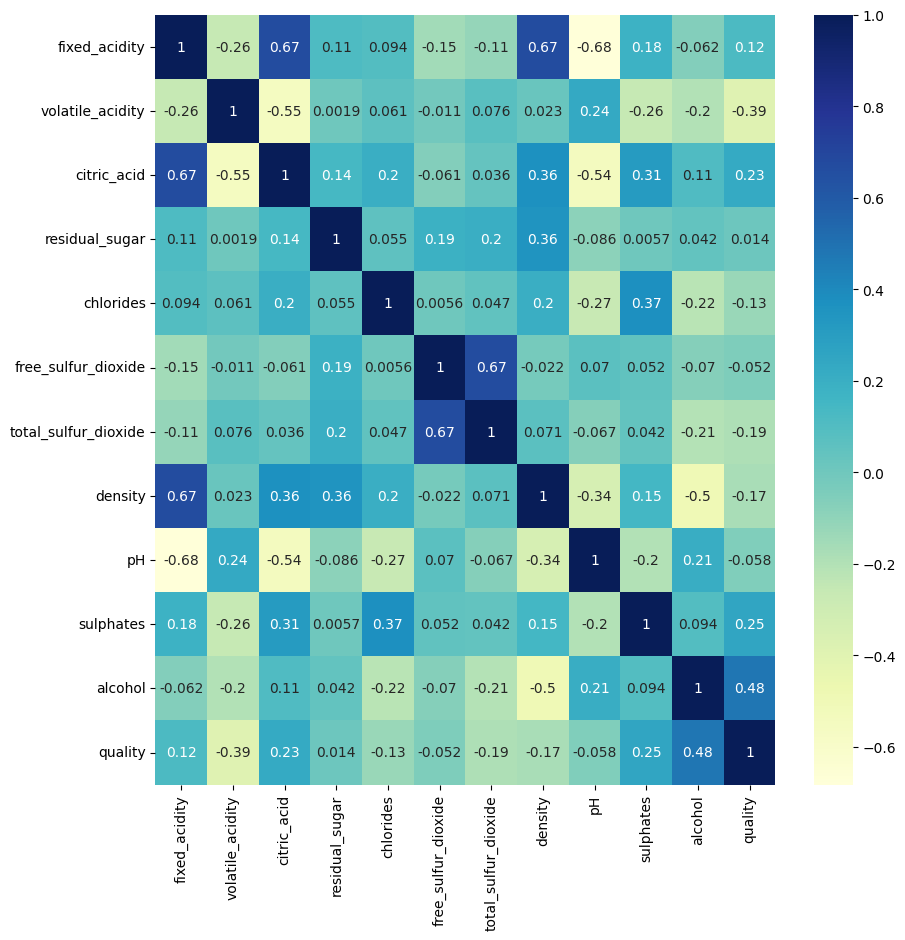

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(data_correlation, annot=True, cmap='YlGnBu', cbar= True )

### Conclusion 

- A substantial negative correlation exists between density and alcohol, yet a large positive correlation exists between density with residual sugar.
- The correlation between density and fixed acidity is positive.
- Citric acid and fixed acidity correlate positively; citric acid and volatile acidity correlate negatively; and free sulphur dioxide and total sulphur dioxide correlate favorably.